__PHARML 2022 CHALLENGE - EDA SECTION__

Prognostic models have a wide-array of applications and are used in academic and clinical settings. Lung cancer is newly diagnosed in 2.3 million people per year and is divided in Non-Small Cell Lung Cancer (NSCLC) and Small Cell Lung Cancer (SCLC). NSCLC accounts for 84% of the total cases. The 5-year survival rate for patients with NSCLC is 25%, but prognosis can vary depending on many factors including demographics, clinical characteristics, and genomic mutations, among others. Survival Machine Learning models could enable us to make much better prognosis prediction, which in turn has real world clinical applications. Prognostic models could be used to help us identify the most predictive and novel biomarkers influencing the risk of mortality in NSCLC. Additionally, representations learned by fitting Survival Machine Learning models on NSCLC data could be used to stratify patients and obtain clinical clusters or phenotypes that give us insights on disease heterogeneity. Yet another promising application for these models is the potential use of covariate adjustment methods to increase the power of clinical trials and achieve significant results with fewer patients. Finally, it should be noted that there are many other potential relevant real-world applications for these methods.

__FEATURES USED:-__ 

- patientid: unique identifier for the patient
- daysto_event: Days from index (First line starting) to event or loss to follow up
- event_died: Whether the patient experienced death (1) or lost to followup (0)
- diagnosis_nsclc_year: Calendar year the patient was diagnosed with NSCLC
- diagnosis_ansclc_year: Calendar year the patient was diagnosed with aNSCLC
- ecog: Most recent ECOG score before first line treatment was started
- histology: Cancer histology
- groupstage: Cancer stage
- smokingstatus: Patient’s smoking history
- birthyear: Calendar year the patient was born in - note, for privacy reasons individuals with early birth years are merged into the 1937 group
- gender: Gender values are either “M” for male or “F” for female. Genders other than ‘M’ or ‘F’ are unavailable.
- raceethnicity: As race and ethnicity are not universally recorded, internal rules are used to combine. Data entry errors may have occurred in clinical sites.
- region: US region
- lot_category: What types of drugs were present in the first line. A value like Chemotherapy,Chemotherapy means the first line was two drugs, both being chemotherapies. Assumption made here that same drugs given if similar groupings observed for patients with same cancer histology
- biomarker_pdl1: PDL1 status if measured
- biomarker_alk: ALK status if measured
- biomarker_ros1: ROS1 status if measured
- biomarker_braf: BRAF status if measured
- biomarker_egfr: EGFR status if measured
- biomarker_kras: KRAS status if measured
- lab_creatinine: Most recent Creatinine lab before index
- lab_alanineaminotransferase: Most recent ALT lab before index
- lab_ldh: Most recent LDH lab before index
- bmi: Most recent BMI recorded before index
- index_lot1_year: Calendar year that index (first line start) occurred in
- ageAtdiagnosis: age of patient on diagnosis with cancer (dx_nsclc_year - birth_year)
- timeToprogress: time duration between initial diagnosis and prgression to advanced stage (dx_ansclc_year - dx_nsclc_year)
- TimetoTx: time duration between initial cancer diagnosis and commencement of treatment(index_lot1_year - dx_nsclc_year)
- TxtoFail: time duration between commencing treatment and progression to advanced stage (dx_ansclc_year - index_lot1_year)

In [12]:
#Define Helper function 
load_file <- function(filename) {
    #loads csv into dataframe
    return (read_csv(filename))
}
    
print(load_file)

function(filename) {
    #loads csv into dataframe
    return (read_csv(filename))
}


In [18]:
#Import Library
library(dplyr)
library(ggplot2)
library(tidyr)
library(caret)
library(lubridate)
library(purrr)
library(mgcv)
library(rpart)
library(tidyverse)
library(tidymodels)
library(utils)
library(broom)
library(ellipsis)
library(highr)
library(lattice)
library(methods)
library(nlme)
library(readr)
library(readxl)
library(stats)
library(stringr)
library(ranger)
library(tibble)
library(xgboost)
library(randomforest)
library(magrittr)
library(lubridate)
library(xts)
library(hms)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘purrr’


The following object is masked from ‘package:caret’:

    lift


Warning message:
“package ‘mgcv’ was built under R version 4.1.3”
Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-40. For overview type 'help("mgcv-package")'.

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ nlme::collapse()         masks dplyr::collapse()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks

ERROR: Error in library(tidymodels): there is no package called ‘tidymodels’


In [37]:
#Load in dataframe
flatiron_train <- read_csv("/pharml/data/flatiron_training.csv")

Rows: 31334 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): patientid, ecog, histology, groupstage, smokingstatus, gender, rac...
dbl  (7): daysto_event, event_died, diagnosis_nsclc_year, diagnosis_ansclc_y...
lgl  (6): biomarker_pdl1, biomarker_alk, biomarker_ros1, biomarker_braf, bio...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [38]:
head(flatiron_train)

patientid,daysto_event,event_died,diagnosis_nsclc_year,diagnosis_ansclc_year,ecog,histology,groupstage,smokingstatus,birthyear,⋯,biomarker_alk,biomarker_ros1,biomarker_braf,biomarker_egfr,biomarker_kras,lab_creatinine,lab_alanineaminotransferase,lab_ldh,bmi,index_lot1_year
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
PHARML000001,156,0,2002,2019,1,Squamous cell carcinoma,Stage IIA,History of smoking,1951,⋯,NA,NA,NA,NA,NA,normal,normal,NA,19.34262,2019
PHARML000003,190,1,2013,2014,Unknown,Non-squamous cell carcinoma,Stage IIIA,History of smoking,1946,⋯,NA,NA,NA,NA,NA,NA,normal,NA,22.41903,2014
PHARML000004,74,1,2020,2020,Unknown,Non-squamous cell carcinoma,Stage IIIC,History of smoking,1944,⋯,NA,NA,NA,NA,NA,NA,NA,NA,26.63880,2020
PHARML000008,52,1,2020,2020,1,Non-squamous cell carcinoma,Stage IV,History of smoking,1937,⋯,NA,NA,NA,NA,NA,normal,abnormal,NA,18.94848,2020
PHARML000009,392,0,2021,2021,0,Non-squamous cell carcinoma,Stage IIIB,History of smoking,1966,⋯,NA,NA,NA,NA,NA,normal,normal,abnormal,21.33351,2021
PHARML000011,39,1,2017,2017,Unknown,Non-squamous cell carcinoma,Stage IV,History of smoking,1943,⋯,NA,NA,NA,NA,NA,normal,normal,normal,16.65117,2017


In [39]:
summary(flatiron_train)

  patientid          daysto_event      event_died     diagnosis_nsclc_year
 Length:31334       Min.   :   1.0   Min.   :0.0000   Min.   :1990        
 Class :character   1st Qu.: 112.0   1st Qu.:0.0000   1st Qu.:2014        
 Mode  :character   Median : 280.0   Median :1.0000   Median :2016        
                    Mean   : 484.2   Mean   :0.7273   Mean   :2016        
                    3rd Qu.: 639.0   3rd Qu.:1.0000   3rd Qu.:2019        
                    Max.   :3948.0   Max.   :1.0000   Max.   :2022        
                                                      NA's   :5           
 diagnosis_ansclc_year     ecog            histology          groupstage       
 Min.   :2011          Length:31334       Length:31334       Length:31334      
 1st Qu.:2014          Class :character   Class :character   Class :character  
 Median :2017          Mode  :character   Mode  :character   Mode  :character  
 Mean   :2016                                                                  


In [49]:
#Include in new columns - age at diagnosis, time to progress to advanced cancer & time to start treatment
flatiron_train <- flatiron_train %>% mutate(ageAtdiagnosis = diagnosis_nsclc_year - birthyear, 
    yrsToprogress = diagnosis_ansclc_year - diagnosis_nsclc_year, 
                                              TimetoTx = index_lot1_year - diagnosis_nsclc_year)
head(flatiron_train)

patientid,daysto_event,event_died,diagnosis_nsclc_year,diagnosis_ansclc_year,ecog,histology,groupstage,smokingstatus,birthyear,⋯,biomarker_egfr,biomarker_kras,lab_creatinine,lab_alanineaminotransferase,lab_ldh,bmi,index_lot1_year,ageAtdiagnosis,yrsToprogress,TimetoTx
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<lgl>,<lgl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PHARML000001,156,0,2002,2019,1,Squamous cell carcinoma,Stage IIA,History of smoking,1951,⋯,NA,NA,normal,normal,NA,19.34262,2019,51,17,17
PHARML000003,190,1,2013,2014,Unknown,Non-squamous cell carcinoma,Stage IIIA,History of smoking,1946,⋯,NA,NA,NA,normal,NA,22.41903,2014,67,1,1
PHARML000004,74,1,2020,2020,Unknown,Non-squamous cell carcinoma,Stage IIIC,History of smoking,1944,⋯,NA,NA,NA,NA,NA,26.63880,2020,76,0,0
PHARML000008,52,1,2020,2020,1,Non-squamous cell carcinoma,Stage IV,History of smoking,1937,⋯,NA,NA,normal,abnormal,NA,18.94848,2020,83,0,0
PHARML000009,392,0,2021,2021,0,Non-squamous cell carcinoma,Stage IIIB,History of smoking,1966,⋯,NA,NA,normal,normal,abnormal,21.33351,2021,55,0,0
PHARML000011,39,1,2017,2017,Unknown,Non-squamous cell carcinoma,Stage IV,History of smoking,1943,⋯,NA,NA,normal,normal,normal,16.65117,2017,74,0,0


In [77]:
install.packages("naniar", "/tmp/RtmpopXkDN/downloaded_packages")

also installing the dependencies ‘gridExtra’, ‘norm’, ‘visdat’, ‘viridis’, ‘UpSetR’




In [104]:
library("naniar", lib.loc=.libPaths("/tmp/RtmpopXkDN/downloaded_packages"))

In [120]:
#Replace 'unknown' values in ecog & smokingstatus columns with 'NA'
flatiron_train <- flatiron_train %>% replace_with_na(replace = list(ecog = "Unknown", smokingstatus = 
                "Unknown", gender = "Unknown", raceethnicity = "Unknown", region = "Unknown", 
                                                                    lot_category = "Unknown"))
head(flatiron_train)

patientid,daysto_event,event_died,diagnosis_nsclc_year,diagnosis_ansclc_year,ecog,histology,groupstage,smokingstatus,birthyear,⋯,biomarker_egfr,biomarker_kras,lab_creatinine,lab_alanineaminotransferase,lab_ldh,bmi,index_lot1_year,ageAtdiagnosis,yrsToprogress,TimetoTx
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<lgl>,<lgl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PHARML000001,156,0,2002,2019,1,Squamous cell carcinoma,Stage IIA,History of smoking,1951,⋯,NA,NA,normal,normal,NA,19.34262,2019,51,17,17
PHARML000003,190,1,2013,2014,0,Non-squamous cell carcinoma,Stage IIIA,History of smoking,1946,⋯,NA,NA,NA,normal,NA,22.41903,2014,67,1,1
PHARML000004,74,1,2020,2020,0,Non-squamous cell carcinoma,Stage IIIC,History of smoking,1944,⋯,NA,NA,NA,NA,NA,26.63880,2020,76,0,0
PHARML000008,52,1,2020,2020,1,Non-squamous cell carcinoma,Stage IV,History of smoking,1937,⋯,NA,NA,normal,abnormal,NA,18.94848,2020,83,0,0
PHARML000009,392,0,2021,2021,0,Non-squamous cell carcinoma,Stage IIIB,History of smoking,1966,⋯,NA,NA,normal,normal,abnormal,21.33351,2021,55,0,0
PHARML000011,39,1,2017,2017,0,Non-squamous cell carcinoma,Stage IV,History of smoking,1943,⋯,NA,NA,normal,normal,normal,16.65117,2017,74,0,0


In [223]:
flatiron_train1 <- flatiron_train

In [224]:
#Track missing values - to id post imputation
flatiron_sh <- bind_shadow(flatiron_train1, only_miss = TRUE)

In [225]:
head(flatiron_train1)

patientid,daysto_event,event_died,diagnosis_nsclc_year,diagnosis_ansclc_year,ecog,histology,groupstage,smokingstatus,birthyear,⋯,biomarker_egfr,biomarker_kras,lab_creatinine,lab_alanineaminotransferase,lab_ldh,bmi,index_lot1_year,ageAtdiagnosis,yrsToprogress,TimetoTx
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PHARML000001,156,0,2002,2019,1,Squamous cell carcinoma,0,0,1951,⋯,0,0,normal,normal,0,19.34262,2019,51,17,17
PHARML000003,190,1,2013,2014,0,Non-squamous cell carcinoma,1,0,1946,⋯,0,0,0,normal,0,22.41903,2014,67,1,1
PHARML000004,74,1,2020,2020,0,Non-squamous cell carcinoma,2,0,1944,⋯,0,0,0,0,0,26.63880,2020,76,0,0
PHARML000008,52,1,2020,2020,1,Non-squamous cell carcinoma,3,0,1937,⋯,0,0,normal,abnormal,0,18.94848,2020,83,0,0
PHARML000009,392,0,2021,2021,0,Non-squamous cell carcinoma,4,0,1966,⋯,0,0,normal,normal,abnormal,21.33351,2021,55,0,0
PHARML000011,39,1,2017,2017,0,Non-squamous cell carcinoma,3,0,1943,⋯,0,0,normal,normal,normal,16.65117,2017,74,0,0


#Assumption for baseline model = all NA values equal absence of disease or abnormal result = 0

In [115]:
#Check for NA values in the dataframe with 0
any_na(flatiron_train$daysto_event)
any_na(flatiron_train$event_died)
any_na(flatiron_train$ecog)
any_na(flatiron_train$histology)
any_na(flatiron_train$groupstage)
any_na(flatiron_train$smokingstatus)
any_na(flatiron_train$bmi)
any_na(flatiron_train$ageAtdiagnosis)
any_na(flatiron_train$yrsToprogress)
any_na(flatiron_train$TimetoTx)

[1] FALSE

[1] FALSE

[1] TRUE

[1] FALSE

[1] FALSE

[1] FALSE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

In [168]:
#Replace all NA values with 0
toReplace1 <- which(is.na(flatiron_train$ecog))

flatiron_train$ecog[toReplace1] <- 0

#BMI
toReplace2 <- which(is.na(flatiron_train$bmi))
flatiron_train$bmi[toReplace2] <- 0

#Age at Diagnosis
toReplace3 <- which(is.na(flatiron_train$ageAtdiagnosis))
flatiron_train$ageAtdiagnosis[toReplace3] <- 0

#yrs to progress
toReplace4 <- which(is.na(flatiron_train$yrsToprogress))
flatiron_train$yrsToprogress[toReplace4] <- 0

#Time to treatment
toReplace5 <- which(is.na(flatiron_train$TimetoTx))
flatiron_train$TimetoTx[toReplace5] <- 0

#Gender 
toReplace6 <- which(is.na(flatiron_train$gender))
flatiron_train$gender[toReplace6] <- 0

#Raceethnicity
toReplace7 <- which(is.na(flatiron_train$raceethnicity))
flatiron_train$raceethnicity[toReplace7] <- 0

#Region
toReplace8 <- which(is.na(flatiron_train$region))
flatiron_train$region[toReplace8] <- 0

#Lotcategory
toReplace9 <- which(is.na(flatiron_train$lot_category))
flatiron_train$lot_category[toReplace9] <- 0

#biomarker_pdl1
toReplace10 <- which(is.na(flatiron_train$biomarker_pdl1))
flatiron_train$biomarker_pdl1[toReplace10] <- 0

#biomarker_alk
toReplace11 <- which(is.na(flatiron_train$biomarker_alk))
flatiron_train$biomarker_alk[toReplace11] <- 0

#biomarker_egfr
toReplace12 <- which(is.na(flatiron_train$biomarker_egfr))
flatiron_train$biomarker_egfr[toReplace12] <- 0

#biomarker_kras
toReplace13 <- which(is.na(flatiron_train$biomarker_kras))
flatiron_train$biomarker_kras[toReplace13] <- 0

#biomrker_ros1
toReplace14 <- which(is.na(flatiron_train$biomarker_ros1))
flatiron_train$biomarker_ros1[toReplace14] <- 0

#lab_creatinine
toReplace15 <- which(is.na(flatiron_train$lab_creatinine))
flatiron_train$lab_creatinine[toReplace15] <- 0

#lab_alt
toReplace16 <- which(is.na(flatiron_train$lab_alanineaminotransferase))
flatiron_train$lab_alanineaminotransferase[toReplace16] <- 0

#lab_ldh
toReplace17 <- which(is.na(flatiron_train$lab_ldh))
flatiron_train$lab_ldh[toReplace17] <- 0

#biomarker_braf
toReplace18 <- which(is.na(flatiron_train$biomarker_braf))
flatiron_train$biomarker_braf[toReplace18] <- 0

In [169]:
#Select only relevant columns and check if any NA values persist

flatiron_select <- flatiron_train %>% select(daysto_event, event_died, ecog, histology, groupstage, 
        smokingstatus, gender, raceethnicity, region, lot_category, biomarker_pdl1, biomarker_egfr, 
        biomarker_alk, biomarker_ros1, biomarker_braf, biomarker_kras, lab_creatinine, 
        lab_alanineaminotransferase, lab_ldh, bmi, ageAtdiagnosis, yrsToprogress, TimetoTx)                                       

In [170]:
head(flatiron_select)

daysto_event,event_died,ecog,histology,groupstage,smokingstatus,gender,raceethnicity,region,lot_category,⋯,biomarker_ros1,biomarker_braf,biomarker_kras,lab_creatinine,lab_alanineaminotransferase,lab_ldh,bmi,ageAtdiagnosis,yrsToprogress,TimetoTx
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
156,0,1,Squamous cell carcinoma,Stage IIA,History of smoking,M,Hispanic or Latino (any),South,"Chemotherapy,Chemotherapy,Immunotherapy",⋯,0,0,0,normal,normal,0,19.34262,51,17,17
190,1,0,Non-squamous cell carcinoma,Stage IIIA,History of smoking,F,Hispanic or Latino (any),Midwest,Chemotherapy,⋯,0,0,0,0,normal,0,22.41903,67,1,1
74,1,0,Non-squamous cell carcinoma,Stage IIIC,History of smoking,M,Hispanic or Latino (any),Midwest,"Chemotherapy,Immunotherapy,Immunotherapy,Chemotherapy",⋯,0,0,0,0,0,0,26.63880,76,0,0
52,1,1,Non-squamous cell carcinoma,Stage IV,History of smoking,F,Hispanic or Latino (any),Northeast,Immunotherapy,⋯,0,0,0,normal,abnormal,0,18.94848,83,0,0
392,0,0,Non-squamous cell carcinoma,Stage IIIB,History of smoking,M,Non-Hispanic White,Northeast,"Chemotherapy,Chemotherapy",⋯,0,0,0,normal,normal,abnormal,21.33351,55,0,0
39,1,0,Non-squamous cell carcinoma,Stage IV,History of smoking,F,Hispanic or Latino (any),West,Immunotherapy,⋯,0,0,0,normal,normal,normal,16.65117,74,0,0


__EXPLORATORY DATA ANALYSIS__

In [148]:
#Filter out datasets according to histology type

squamous_cellca <- flatiron_train %>% filter(histology == "Squamous cell carcinoma")
nrow(squamous_cellca)

nonsquam_cellca <- flatiron_train %>% filter(histology == "Non-squamous cell carcinoma")
nrow(nonsquam_cellca)

[1] 8046

[1] 21832

In [333]:
#What's median(age at diagnosis), (timetoprogress to advancedcancer) & (timeto start treatment) by histology?
flatiron_select %>% group_by(histology) %>% summarise(median(ageAtdiagnosis), mean(ageAtdiagnosis), sd(ageAtdiagnosis), 
                                                      mean(yrsToprogress), mean(TimetoTx), n())


histology,median(ageAtdiagnosis),mean(ageAtdiagnosis),sd(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,70,68.45029,8.499710,0.4516530,0.5397713,8046
1,68,67.01415,9.518461,0.4210791,0.5162605,21832
2,68,66.73352,10.029256,0.3337912,0.4395604,1456


__Nil significant age differences between the 3 groups with the squamous cell ca patients on average being the oldest cohort at diagnosis, with the NSCLC-NOS group being the youngest. This group (NSCLC-NOS) also appear to have the most aggressive tumours (with the least amount of time to progress to advanced cancer). The Non squamous cell ca group is the largest group, comprising over 21,000 patients in the dataset__

In [334]:
#What's median(age at diagnosis), (timetoprogress to advancedcancer) & (timeto start treatment) by region?
flatiron_select %>% group_by(region) %>% summarise(median(ageAtdiagnosis), median(yrsToprogress), 
                                                      median(TimetoTx), n())

region,median(ageAtdiagnosis),median(yrsToprogress),median(TimetoTx),n()
<chr>,<dbl>,<dbl>,<dbl>,<int>
0,68,0,0,4559
Midwest,68,0,0,4455
Northeast,69,0,0,5092
South,68,0,0,12603
West,70,0,0,4625


__Nil significant age differences by US region for average age at diagnosis, with the South region showing the least average time to progress to advanced cancer. All appear to take longer to start treatment than to progress to advanced cancer (?implication being that treatment is starting later than required)__

In [338]:
#What's AVG(age at diagnosis) and median(age at diagnosis) by raceethnicity?
flatiron_select %>% group_by(raceethnicity) %>% summarise(mean(ageAtdiagnosis), sd(ageAtdiagnosis), 
                                                          median(ageAtdiagnosis), n())                                                        

raceethnicity,mean(ageAtdiagnosis),sd(ageAtdiagnosis),median(ageAtdiagnosis),n()
<chr>,<dbl>,<dbl>,<dbl>,<int>
Hispanic or Latino (any),67.25275,9.286132,68.0,24716
Non-Hispanic Asian,65.22794,11.028560,66.5,136
Non-Hispanic Black,65.44715,9.646077,67.0,369
Non-Hispanic White,67.91375,9.344611,69.0,2574
Other Race,68.07516,9.312155,69.0,3539


__Similar mean age (& spread) at diagnosis across all racial/ethnic groups, with slightly higher mean age of 67yrs for Hispanic or Latino group vs Asians, Blacks and Whites. The Hispanic or Latino group also make up the vast majority of the patients in the dataset (at 24,716)__

In [339]:
#What's AVG(age at diagnosis), by raceethnicity & gender?
flatiron_select %>% group_by(raceethnicity, gender) %>% summarise(mean(ageAtdiagnosis), sd(ageAtdiagnosis), 
                                                      median(ageAtdiagnosis), n())

`summarise()` has grouped output by 'raceethnicity'. You can override using the
`.groups` argument.


raceethnicity,gender,mean(ageAtdiagnosis),sd(ageAtdiagnosis),median(ageAtdiagnosis),n()
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>
Hispanic or Latino (any),F,66.90562,9.486120,68.0,11718
Hispanic or Latino (any),M,67.56570,9.091083,69.0,12998
Non-Hispanic Asian,F,64.95161,11.774420,66.0,62
Non-Hispanic Asian,M,65.45946,10.438586,67.0,74
Non-Hispanic Black,F,65.61818,9.361619,67.0,165
Non-Hispanic Black,M,65.30882,9.890918,66.5,204
Non-Hispanic White,F,67.69829,9.518453,69.0,1170
Non-Hispanic White,M,68.09330,9.196779,69.0,1404
Other Race,0,50.00000,NA,50.0,1


__For all identified races (besides "Other Race"), similar ages at diagnosis. "Non-Hispanic Asian" males demonstrated the least time to progress to advanced stages of cancer, with Hispanic or Latino females taking the longest time to progress to advanced cancer.__ 

In [341]:
#Sub-segmenting patients by smoking status
flatiron_select %>% group_by(smokingstatus) %>% summarise(mean(ageAtdiagnosis), sd(ageAtdiagnosis), 
                                                          median(ageAtdiagnosis), n())

smokingstatus,mean(ageAtdiagnosis),sd(ageAtdiagnosis),median(ageAtdiagnosis),n()
<chr>,<dbl>,<dbl>,<dbl>,<int>
History of smoking,67.48496,9.030107,69,27188
No history of smoking,66.58207,11.068708,68,3972
Unknown/Not documented,67.37356,8.321127,70,174


__The vast majority of patients in the dataset were smokers, with 86.8% identified as smokers, and 12.7% identified as non-smokers__

In [342]:
#Sub-segmenting patients by smoking status & gender
flatiron_select %>% group_by(smokingstatus, gender) %>% summarise(mean(ageAtdiagnosis), sd(ageAtdiagnosis),
                                                    mean(yrsToprogress), mean(TimetoTx), n())

`summarise()` has grouped output by 'smokingstatus'. You can override using the
`.groups` argument.


smokingstatus,gender,mean(ageAtdiagnosis),sd(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
History of smoking,0,50.00000,NA,0.0000000,0.0000000,1
History of smoking,F,67.08786,9.193209,0.4789692,0.5790524,12030
History of smoking,M,67.80128,8.885334,0.3862902,0.4766115,15157
No history of smoking,F,66.94444,10.945132,0.4284627,0.5197869,2628
No history of smoking,M,65.87351,11.276941,0.3697917,0.4583333,1344
Unknown/Not documented,F,67.26027,7.835155,0.3698630,0.4246575,73
Unknown/Not documented,M,67.45545,8.693129,0.4554455,0.5049505,101


__38.3% of all females in the dataset were smokers, 48.3% were male smokers, 8.4% were female non-smokers and 4.3% were male non-smokers__

In [171]:
#For genetic component
flatiron_select %>% group_by(biomarker_ros1, biomarker_braf, biomarker_pdl1, biomarker_egfr, 
                             biomarker_alk, biomarker_kras) %>% summarise(mean(ageAtdiagnosis), 
                                                            mean(yrsToprogress), mean(TimetoTx), n())

`summarise()` has grouped output by 'biomarker_ros1', 'biomarker_braf',
'biomarker_pdl1', 'biomarker_egfr', 'biomarker_alk'. You can override using the
`.groups` argument.


biomarker_ros1,biomarker_braf,biomarker_pdl1,biomarker_egfr,biomarker_alk,biomarker_kras,mean(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,0,0,0,0,0,67.35956,0.4215092,0.5155756,31010
0,0,0,0,0,1,68.57143,0.7571429,0.8285714,70
0,0,0,0,1,0,51.75000,0.5000000,0.5000000,4
0,0,0,0,1,1,71.00000,2.0000000,2.0000000,1
0,0,0,1,0,0,68.40351,0.8596491,0.8596491,57
0,0,0,1,1,0,66.50000,1.0000000,1.5000000,2
0,0,1,0,0,0,69.16107,0.6375839,0.7382550,149
0,0,1,0,0,1,66.91304,1.3478261,1.4347826,23
0,0,1,0,1,0,49.00000,0.0000000,0.0000000,1


In [172]:
#Biomarker_ros1
flatiron_select %>% group_by(biomarker_ros1) %>% summarise(mean(ageAtdiagnosis), 
                                                            mean(yrsToprogress), mean(TimetoTx), n())

biomarker_ros1,mean(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,67.36981,0.4248691,0.5187348,31332
1,68.50000,0.5000000,0.5000000,2


In [179]:
#Biomarker_ros1 + smoking status
flatiron_select %>% group_by(biomarker_ros1, smokingstatus) %>% summarise(mean(ageAtdiagnosis), 
                                                            mean(yrsToprogress), mean(TimetoTx), n())

`summarise()` has grouped output by 'biomarker_ros1'. You can override using
the `.groups` argument.


biomarker_ros1,smokingstatus,mean(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>
0,History of smoking,67.48496,0.4272841,0.5219214,27188
0,No history of smoking,66.58111,0.4085642,0.4989924,3970
0,Unknown/Not documented,67.37356,0.4195402,0.4712644,174
1,No history of smoking,68.50000,0.5000000,0.5000000,2


Only 2 patients were identified as biomarker_ros1 POSITIVE with an average age of 68, neither of whom smoked.

In [180]:
#Biomarker_braf + smoking status
flatiron_select %>% group_by(biomarker_braf, smokingstatus) %>% summarise(mean(ageAtdiagnosis), 
                                                            mean(yrsToprogress), mean(TimetoTx), n())

`summarise()` has grouped output by 'biomarker_braf'. You can override using
the `.groups` argument.


biomarker_braf,smokingstatus,mean(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>
0,History of smoking,67.48475,0.4272470,0.5219087,27181
0,No history of smoking,66.58021,0.4087132,0.4991186,3971
0,Unknown/Not documented,67.37356,0.4195402,0.4712644,174
1,History of smoking,68.28571,0.5714286,0.5714286,7
1,No history of smoking,74.00000,0.0000000,0.0000000,1


__8 patients tested positive for biomarker braf, with 7 identified as smokers and 1 being a non-smoker__

In [181]:
#Biomarker_pdl1 + smoking status
flatiron_select %>% group_by(biomarker_pdl1, smokingstatus) %>% summarise(mean(ageAtdiagnosis), 
                                                            mean(yrsToprogress), mean(TimetoTx), n())

`summarise()` has grouped output by 'biomarker_pdl1'. You can override using
the `.groups` argument.


biomarker_pdl1,smokingstatus,mean(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>
0,History of smoking,67.47781,0.4253358,0.5199660,27021
0,No history of smoking,66.57367,0.4083902,0.4986101,3957
0,Unknown/Not documented,67.37356,0.4195402,0.4712644,174
1,History of smoking,68.64072,0.7425150,0.8383234,167
1,No history of smoking,68.80000,0.4666667,0.6000000,15


__182 patients tesed positive for biomarker_pdl1, with 91.8% of the pdl1+ve patients being smokers__

In [182]:
#Biomarker_egfr + smoking status
flatiron_select %>% group_by(biomarker_egfr, smokingstatus) %>% summarise(mean(ageAtdiagnosis), 
                                                            mean(yrsToprogress), mean(TimetoTx), n())

`summarise()` has grouped output by 'biomarker_egfr'. You can override using
the `.groups` argument.


biomarker_egfr,smokingstatus,mean(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>
0,History of smoking,67.48128,0.4268989,0.5215566,27161
0,No history of smoking,66.58978,0.4043744,0.4956765,3932
0,Unknown/Not documented,67.37356,0.4195402,0.4712644,174
1,History of smoking,71.18519,0.8148148,0.8888889,27
1,No history of smoking,65.82500,0.8250000,0.8250000,40


__67 patients tested egfr +ve, with approximately 60% of these egfr +ve patients identified as non-smokers. Egfr is historically more commonly seen in patients with NSCLC that are non-smokers than in those that smoke.__

In [183]:
#Biomarker_alk + smoking status
flatiron_select %>% group_by(biomarker_alk, smokingstatus) %>% summarise(mean(ageAtdiagnosis), 
                                                            mean(yrsToprogress), mean(TimetoTx), n())

`summarise()` has grouped output by 'biomarker_alk'. You can override using the
`.groups` argument.


biomarker_alk,smokingstatus,mean(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>
0,History of smoking,67.48626,0.4271788,0.5217967,27183
0,No history of smoking,66.59259,0.4086672,0.4991182,3969
0,Unknown/Not documented,67.37356,0.4195402,0.4712644,174
1,History of smoking,60.40000,1.0000000,1.2000000,5
1,No history of smoking,52.66667,0.3333333,0.3333333,3


__8 patients tested positive for biomarker_alk, with 5 patients of these patients identified as smokers and 3 as non-smokers. This tumour marker is also commonly associated with non-smokers that develop NSCLC__

In [184]:
#Biomarker_kras + smoking status
flatiron_select %>% group_by(biomarker_kras, smokingstatus) %>% summarise(mean(ageAtdiagnosis), 
                                                            mean(yrsToprogress), mean(TimetoTx), n())

`summarise()` has grouped output by 'biomarker_kras'. You can override using
the `.groups` argument.


biomarker_kras,smokingstatus,mean(ageAtdiagnosis),mean(yrsToprogress),mean(TimetoTx),n()
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>
0,History of smoking,67.48328,0.4257565,0.5204797,27100
0,No history of smoking,66.57427,0.4073140,0.4976040,3965
0,Unknown/Not documented,67.37356,0.4195402,0.4712644,174
1,History of smoking,68.00000,0.8977273,0.9659091,88
1,No history of smoking,71.00000,1.1428571,1.2857143,7


__95 patients tested positive for biomarker_kras, with the overwhelming majority identified as smokers (92.6%)__

__Time to event decreases significantly as the ecog score increases (i.e. as the patient's performance score gets worse__)

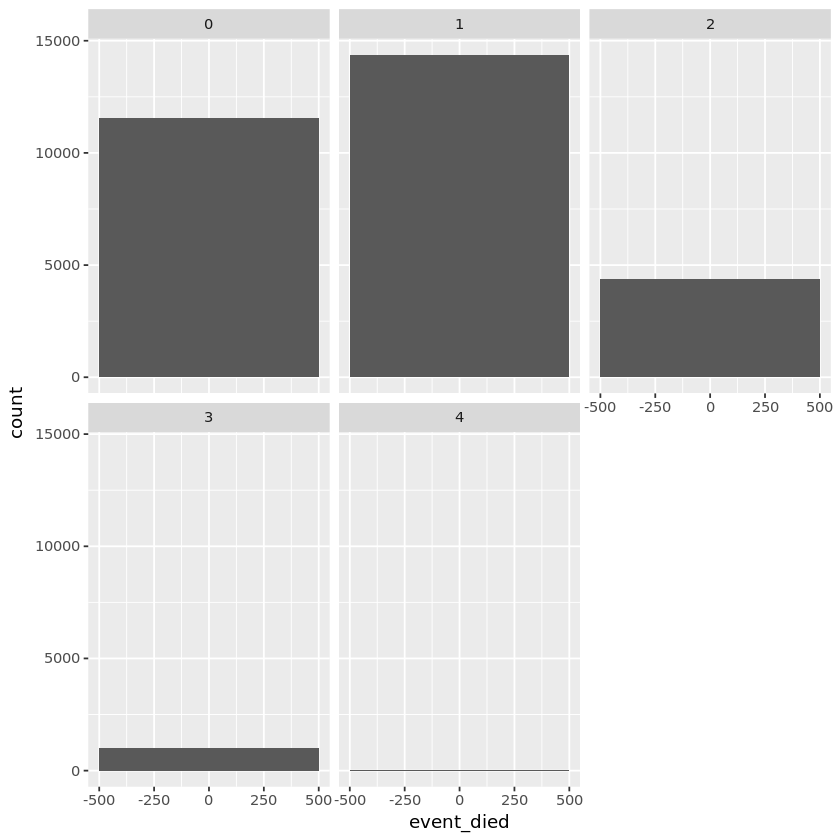

In [329]:
#Faceted histogram plot of number of eventoutcome faceted by ecog - REMOVE., NOT VERY USEFUL
ggplot(flatiron_select, aes(x = event_died)) + geom_histogram(binwidth = 1000) + facet_wrap(~ ecog)

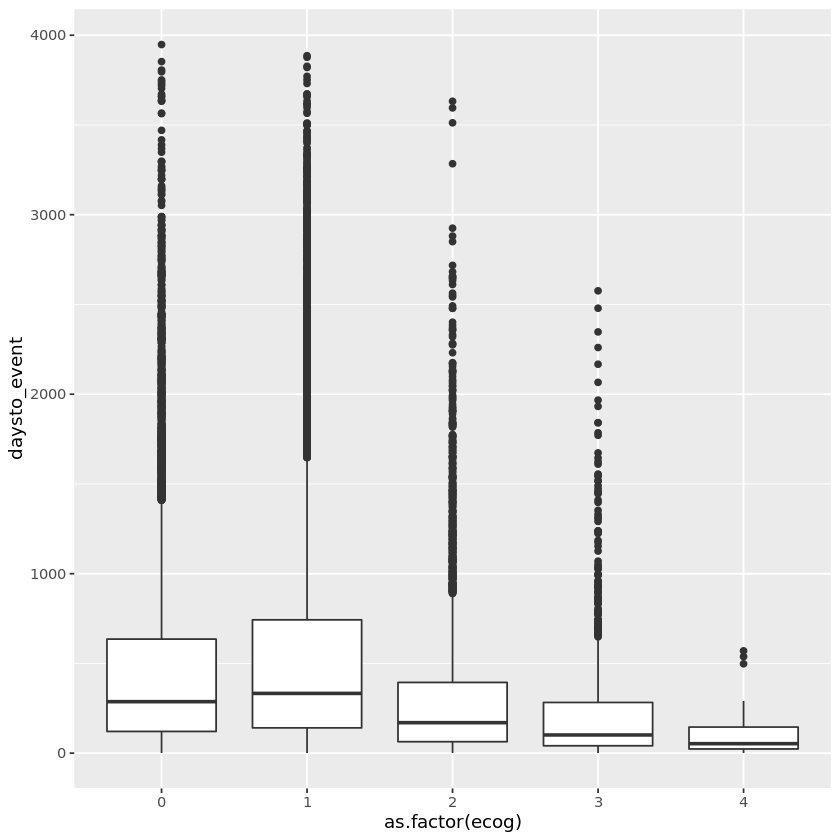

In [330]:
#Boxplot of pt performance status (ecog) against time to event
ggplot(flatiron_select, aes(x = as.factor(ecog), y = daysto_event)) + geom_boxplot()

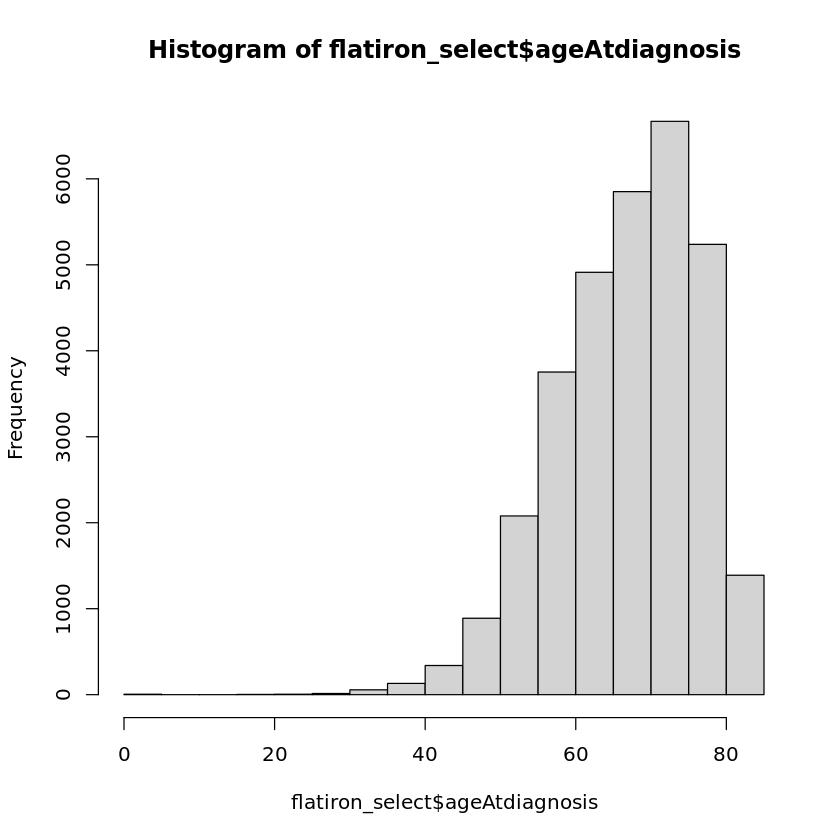

In [418]:
#Ggplot of age distribution
hist(flatiron_select$ageAtdiagnosis)

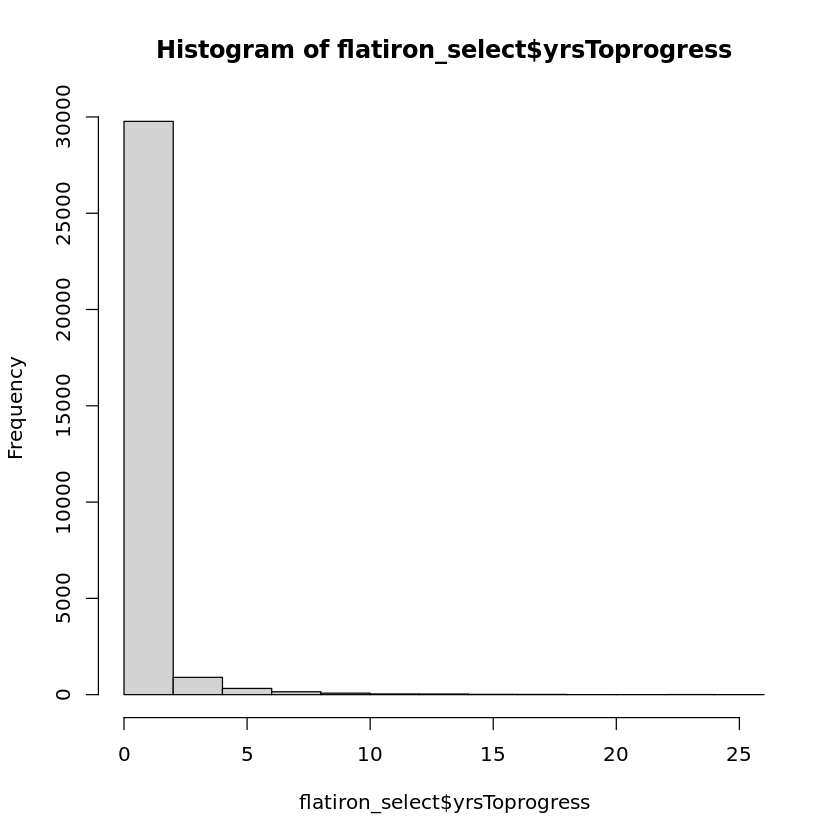

In [419]:
#Ggplot of yrs to progress
hist(flatiron_select$yrsToprogress)

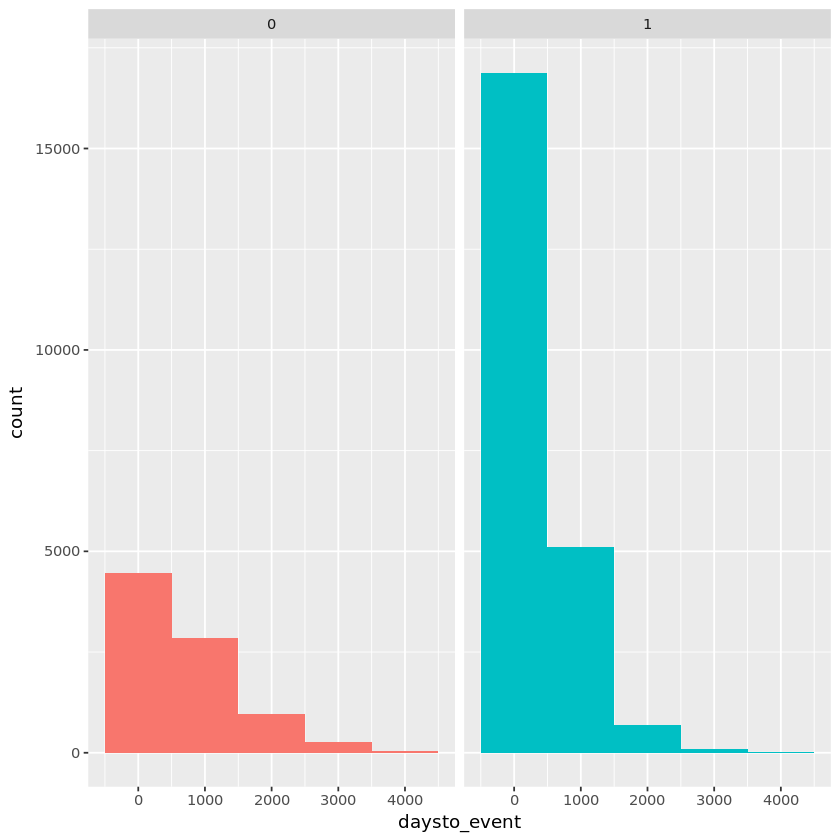

In [244]:
#Faceted histogram plot of number of "daystoevent" faceted by "eventdeath"
ggplot(flatiron_select, aes(x = daysto_event, fill = factor(event_died))) + geom_histogram(binwidth = 1000) + facet_grid(~event_died) + theme(legend.position = "none")

__2 histograms plotted showing the distribution of "daysto_event" dependent on whether the patient died or not. There are significantly more patients that died than those that were censored. The PERCENTAGE OF  of patient deaths THAT occurred in the first 1000 days WAS XXXXXXXXXX. __

__SURVIVAL ANALYSIS__

In [245]:
install.packages("survival", "/tmp/RtmpopXkDN/downloaded_packages")

In [301]:
library("survival", lib.loc=.libPaths("/tmp/RtmpopXkDN/downloaded_packages"))

In [313]:
#Count number of censored patients 

sum(flatiron_select["event_died"] == 0)


[1] 8546

In [320]:
#Count number of patients who DEFINITELY survived beyond 1000 days from index (first line starting tx)
#Assumption - any censored patient died at the time of being censored (they DIED IMMEDIATELY)
t = 1000
sum(flatiron_select["daysto_event"] > t)

[1] 4349

In [321]:
#Count number of patients who MAY HAVE survived beyond 1000 days from index (firs line starting tx)
#Assumption - censored patients NEVER DIE
t = 1000
sum((flatiron_select["daysto_event"] > t) | (flatiron_select["daysto_event"] == 0))

[1] 4349

In [322]:
#Count number of patients who were not censored before 1000 days from index
#Assumption - they either had an event(death) before 1000, at 1000 or after 1000 (at any time) OR
#time of death occurs after (1000 days) - either they died or were censored at a later time after 1000 days
t = 1000
sum((flatiron_select["daysto_event"] == 1) | (flatiron_select["daysto_event"] > t))


[1] 4399

In [ ]:
#Test-train split of data

In [302]:
#Create a new column containing the survival object - the dependent variable in the analysis 

cbind(flatiron_select %>% select(daysto_event, event_died), surv = Surv(flatiron_select$daysto_event, 
                                                                        flatiron_select$event_died)) %>% head(10)

,daysto_event,event_died,surv
,<dbl>,<dbl>,<Surv>
1,156,0,"156, 0"
2,190,1,"190, 1"
3,74,1,"74, 1"
4,52,1,"52, 1"
5,392,0,"392, 0"
6,39,1,"39, 1"
7,1302,0,"1302, 0"
8,181,1,"181, 1"
9,761,1,"761, 1"


The measure of interest in the survival analysis curve is the survival function. This gives the probability that the patient will not die in the period leading up to time point, t. The counterpart to the survival function is the cumulative hazards function. It describes the cumulative risk or the probability that the patient will have died up until time, t. The Hazard rate (aka force of mortality or instantaneous event rate) describes the risk that an event will occur in a small interval around time, t - given that the event has not yet happened.

In [303]:
#Estimate the survival function 

fitKM <- survfit(Surv(flatiron_select$daysto_event, flatiron_select$event_died) ~ 1, type = "kaplan-meier")


In [304]:
print(fitKM)

Call: survfit(formula = Surv(flatiron_select$daysto_event, flatiron_select$event_died) ~ 
    1, type = "kaplan-meier")

         n events median 0.95LCL 0.95UCL
[1,] 31334  22788    361     354     369


__This informs that the dataset contains data on 31334 patients of whom 22788 died during the observation period. The median survival period is 361 days i.e. 50% of patients die within this period of time. This period is the point at which a horizontal line at 0.5 intersects the survival curve__

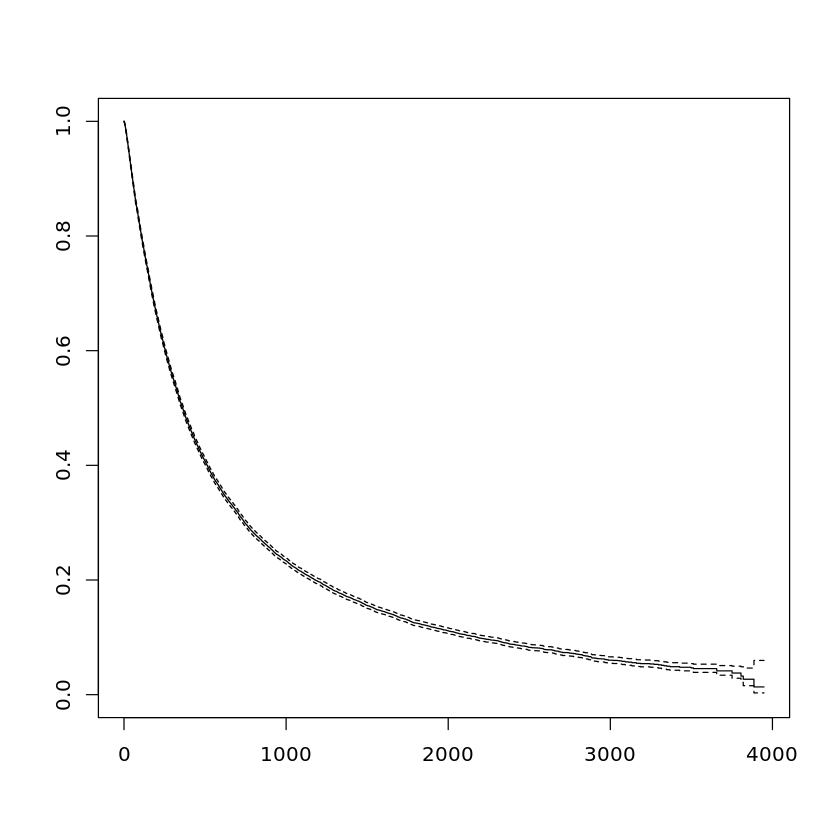

In [305]:
#Plot of survival object - overview of survival function and its confidence intervals
plot(fitKM)

In [251]:
#Modelling the survival function using other independent covariates - egfr to estimate survival curve 
#dependency on egfr

fitKMegfr <- survfit(Surv(daysto_event, event_died) ~ biomarker_egfr, data = flatiron_select)
print(fitKMegfr)

Call: survfit(formula = Surv(daysto_event, event_died) ~ biomarker_egfr, 
    data = flatiron_select)

                     n events median 0.95LCL 0.95UCL
biomarker_egfr=0 31267  22759    361     354     368
biomarker_egfr=1    67     29   1113     652      NA


__Median survival time of patients without egfr is 361 days but in those that are egfr +ve, median survival time INCREASES to 1113 days. 0.95 upper CI of NA implies this value lies outside of the time of observation__

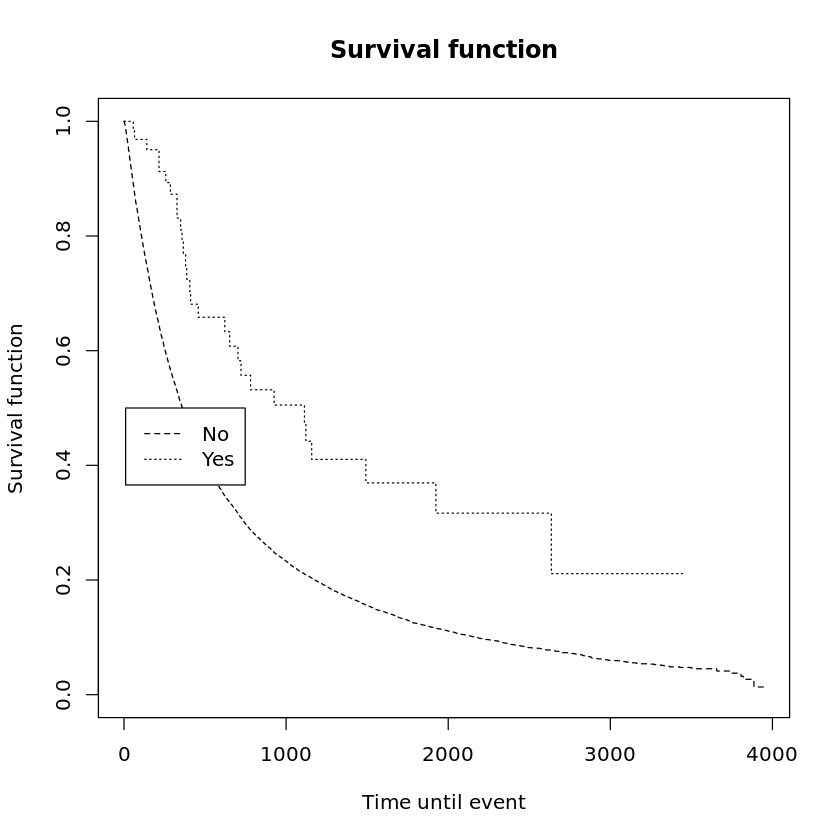

In [254]:
#Plot of survival object with influence of egfr

plot(fitKMegfr, lty = 2:3, xlab = "Time until event", ylab = "Survival function", main = "Survival function")
legend(10, 0.5, c("No", "Yes"), lty = 2:3)

__Plots above show that patients testing positive for egfr live longer than those that do not__

To investigate the effect of multiple patient characteristics on the risk of death, use the Cox Proportionality Hazards model
Specify the units that time is managed in as "days"
For summary statistics and predictions, we need to determine the distribution of the predictor variable. THis is done using the datadist function from rms package.
To make the results permanently accessible, add them to the global options.
Now we can specify the model using the CPH function from the RMS package
To reduce complexity, choose only some variables from the dataset that seem plausible to explain patient death.

In [260]:
install.packages("rms", "/tmp/RtmpopXkDN/downloaded_packages")

also installing the dependencies ‘png’, ‘jpeg’, ‘Formula’, ‘latticeExtra’, ‘foreign’, ‘MatrixModels’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’, ‘checkmate’, ‘Hmisc’, ‘SparseM’, ‘quantreg’, ‘polspline’, ‘multcomp’, ‘htmlTable’, ‘cluster’




In [261]:
library("rms", lib.loc=.libPaths("/tmp/RtmpopXkDN/downloaded_packages"))

Loading required package: Hmisc

Loading required package: Formula


Attaching package: ‘Hmisc’


The following object is masked from ‘package:e1071’:

    impute


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


Loading required package: SparseM


Attaching package: ‘SparseM’


The following object is masked from ‘package:base’:

    backsolve




In [362]:
#Fit a Multivariate COX PH regression analysis model 
units(flatiron_select$daysto_event) <- "Days"
dd <- datadist(flatiron_select)
options(datadist = "dd")
fitCPH1 <- cph(Surv(daysto_event, event_died) ~ ecog + groupstage + smokingstatus + 
               raceethnicity + biomarker_pdl1 + biomarker_egfr + biomarker_alk 
               + biomarker_braf + biomarker_ros1 + biomarker_kras + lab_alanineaminotransferase + 
               lab_creatinine + lab_ldh + bmi + ageAtdiagnosis + yrsToprogress + TimetoTx + gender, 
               data = flatiron_select, x = TRUE, y = TRUE, surv = TRUE, time.inc = 1)

In [363]:
print(fitCPH1)

Cox Proportional Hazards Model
 
 cph(formula = Surv(daysto_event, event_died) ~ ecog + groupstage + 
     smokingstatus + raceethnicity + biomarker_pdl1 + biomarker_egfr + 
     biomarker_alk + biomarker_braf + biomarker_ros1 + biomarker_kras + 
     lab_alanineaminotransferase + lab_creatinine + lab_ldh + 
     bmi + ageAtdiagnosis + yrsToprogress + TimetoTx + gender, 
     data = flatiron_select, x = TRUE, y = TRUE, surv = TRUE, 
     time.inc = 1)
 
                          Model Tests       Discrimination    
                                                   Indexes    
 Obs      31334    LR chi2    1907.02       R2       0.059    
 Events   22788    d.f.            26    R2(26,31334)0.058    
 Center -1.9809    Pr(> chi2)  0.0000    R2(26,22788)0.079    
                   Score chi2 1920.44       Dxy      0.190    
                   Pr(> chi2)  0.0000                         
 
                                      Coef    S.E.   Wald Z Pr(>|Z|)
 ecog                         

__In the Cox Proportional Hazards model, coefficients are interpreted similar to a logistic regression.
ECOG status (0.1878) - the higher the ECOG status, the higher the risk of patient death
Smoking status (No history of smoking, -0.37) - this confers a protective effect on the patient versus a history of smoking ie lower risk of patient death than if the patient smoked.
3 biomarkers appear to be protective i.e. pdl1, egfr and alk, and confer a lower risk of patient death whereas biomarkers braf, ros1 and kras appear to confer a higher incidence of patient death__

The Proportional Hazards assumption implies that the influence of the predictors do not change over time eg it is impossible for gender "male" to have a positive effect on the survival time after a short period of time under observation but a subsequent large negative effect after a longer time under observation

In [289]:
#Display model coefficients
exp(fitCPH1$coefficients)

ecog                           groupstage 
                          1.20595813                           0.98181616 
 smokingstatus=No history of smoking smokingstatus=Unknown/Not documented 
                          0.68898599                           2.27093467 
    raceethnicity=Non-Hispanic Asian     raceethnicity=Non-Hispanic Black 
                          0.70723173                           1.10380512 
    raceethnicity=Non-Hispanic White             raceethnicity=Other Race 
                          1.12605273                           1.21957916 
                      biomarker_pdl1                       biomarker_egfr 
                          0.83578537                           0.57722568 
                       biomarker_alk                       biomarker_braf 
                          0.34866391                           1.06092169 
                      biomarker_ros1                       biomarker_kras 
                          3.49788206                           1.43399663 
lab_alanineaminotransferase=abnormal   lab_alanineaminotransferase=normal 
                          1.11059604                           1.00518346 
             lab_creatinine=abnormal                lab_creatinine=normal 
                          1.14013247                           0.93459037 
                    lab_ldh=abnormal                       lab_ldh=normal 
                          1.24611500                           1.01784840 
                                 bmi                       ageAtdiagnosis 
                          0.99130686                           1.01010127 
                       yrsToprogress                             TimetoTx 
                          1.01061275                           0.95540138 
                            gender=F                             gender=M 
                          0.07439123                           0.09075488

The Hazard effect is multiplicative of the coefficient value eg ecog coefficient is 0.1873, the corresponding Hazard effect of ecog is the exponential of 0.18 i.e. it is 1.20
The Hazard ratio (i.e.likelihood) of death __increases__ by 1.21 with increasing ECOG performance status (as the patient worsens) i.e. by 21%. 
The Hazard ratio of death __decreases__ by 0.78 for a non-smoker compared with a smoker i.e. by 22%

For the continuous variables (age at diagnosis, yrs to progress etc - a 1 unit increase in the age at diagnosis __increases__ the hazard ratio i.e. the likelihood of patient death by 1.01. Same for number of yrs to progress.

In [415]:
#Fit a Multivariate COX PH regression analysis model - WITH INTERACTION EFFECTS
units(flatiron_select$daysto_event) <- "Days"
dd <- datadist(flatiron_select)
options(datadist = "dd")
fitCPH2 <- cph(Surv(daysto_event, event_died) ~  groupstage * bmi + smokingstatus * ecog + smokingstatus +
               raceethnicity + biomarker_pdl1 + biomarker_egfr + biomarker_egfr * groupstage + biomarker_alk 
               + biomarker_braf + biomarker_ros1 + biomarker_kras + lab_alanineaminotransferase + 
               lab_creatinine + lab_ldh + ageAtdiagnosis + ageAtdiagnosis * smokingstatus + yrsToprogress + 
               TimetoTx + gender + lot_category, 
               data = flatiron_select, x = TRUE, y = TRUE, surv = TRUE, time.inc = 1)

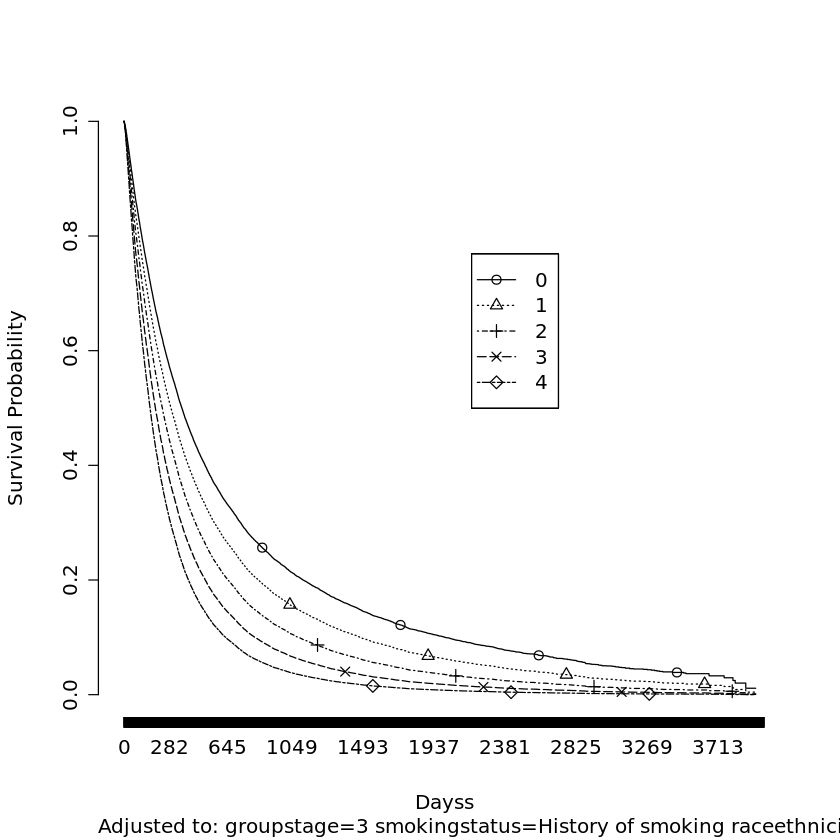

In [408]:
#Visual of predictor effects - plot of survival probability depending on different levels of 1 variable
#with all other coefficients held constant
survplot(fitCPH1, ecog, label.curves = list(keys = 1:5))

__the lower the ecog performance status, the higher the survival probability__

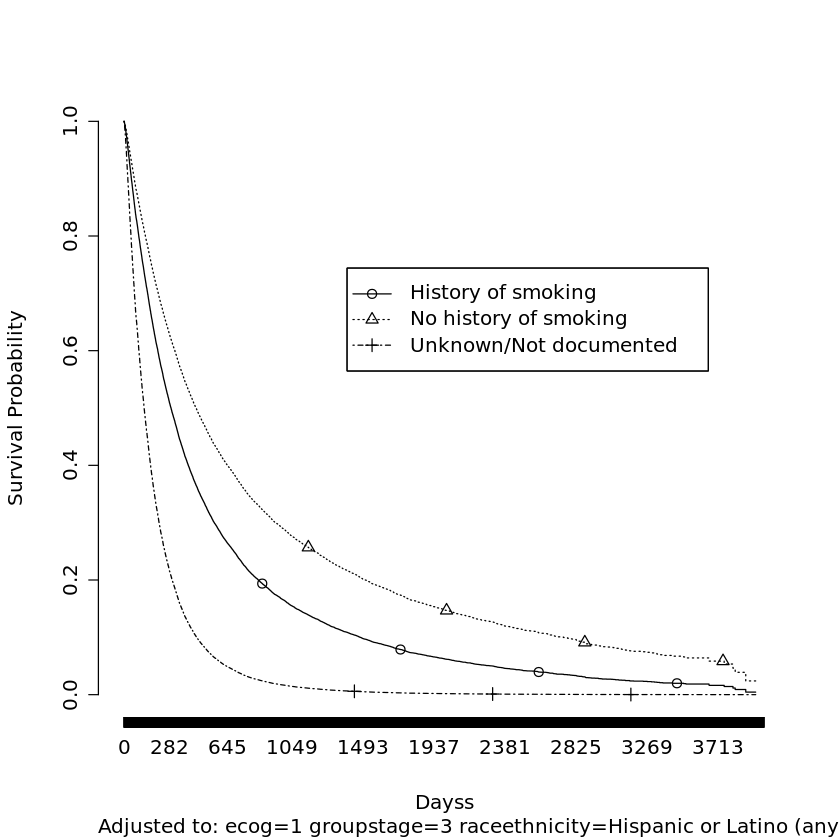

In [285]:
#Visual of predictor effects of smoking status
survplot(fitCPH1, smokingstatus, label.curves = list(keys = 1:3))

__Non-smokers have a higher survival probability than smokers. Unknown/not-documented group likely consist of smokers as well__

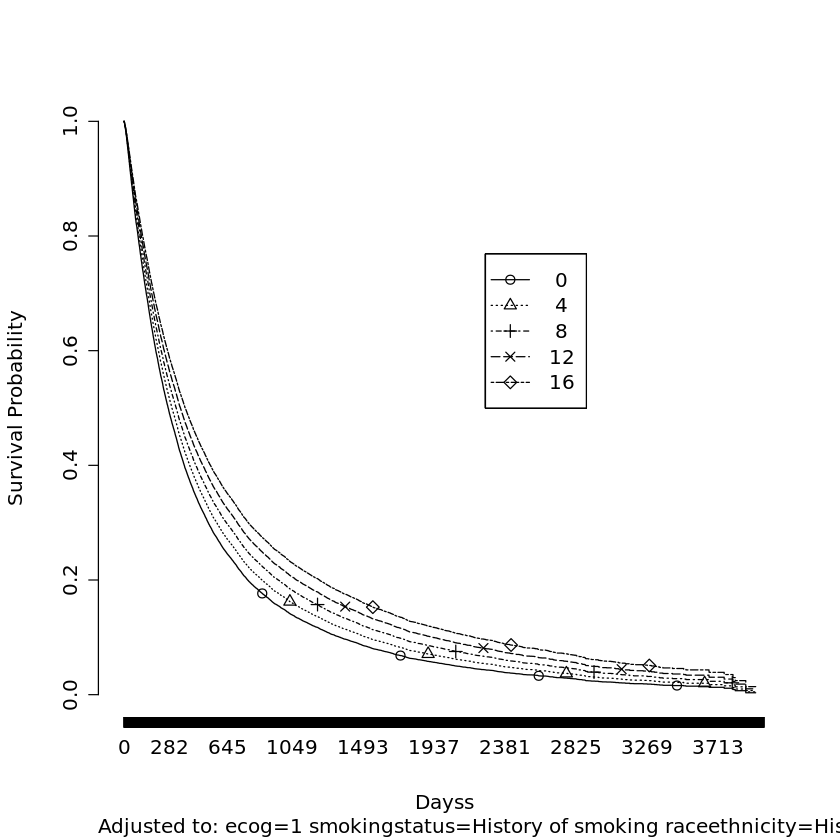

In [286]:
#Visual of predictor effects of groupstage
survplot(fitCPH1, groupstage, label.curves = list(keys = 1:5))

__patients with higher tumour stages (ie higher degrees of spread) appear to have a higher survival probability of survival than those with lower tumour stages - which is not strictly correct__

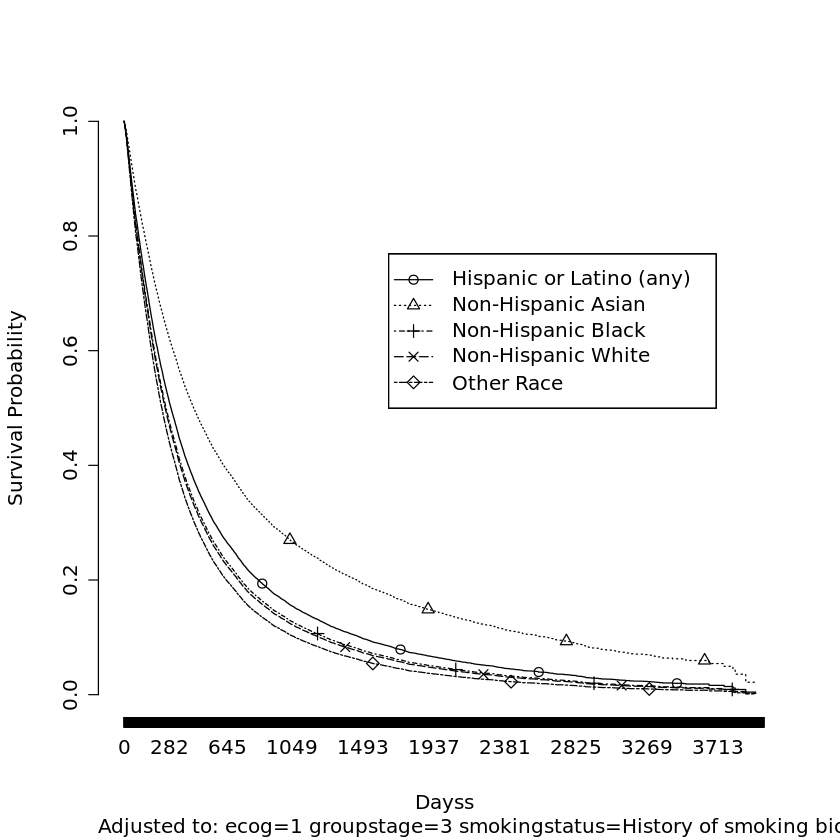

In [287]:
#Visual of predictor effects of raceethnicity 
survplot(fitCPH1, raceethnicity, label.curves = list(keys = 1:5))

__Non-Hispanic Asians appear to have the highest survival probability in the group. Non-Hispanic Blacks, Whites and Other Race appear to have the lowest survival probability in the group.__

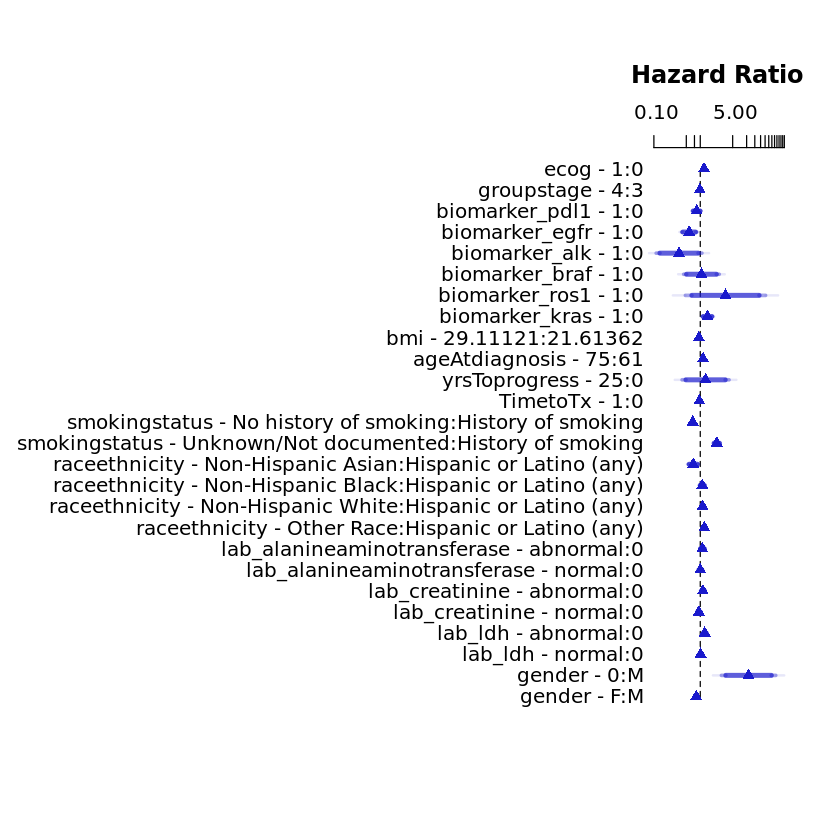

In [288]:
#Visualisation of Hazard Ratios
plot(summary(fitCPH1), log = TRUE)

__Protective features against patient death include biomarkers pdl1, egfr and alk, a history of non-smoking, a race of Non-Hispanic Asian and female gender (compared with male)__

In [291]:
#Model Validation and making predictions
#First validate the Proportional Hazards assumption

testCPH1 <- cox.zph(fitCPH1)
print(testCPH1)

                              chisq df       p
ecog                        206.056  1 < 2e-16
groupstage                   14.565  1 0.00014
smokingstatus               105.493  2 < 2e-16
raceethnicity                17.929  4 0.00127
biomarker_pdl1                0.203  1 0.65254
biomarker_egfr                5.494  1 0.01908
biomarker_alk                 0.800  1 0.37104
biomarker_braf                0.267  1 0.60548
biomarker_ros1                1.472  1 0.22499
biomarker_kras                0.502  1 0.47865
lab_alanineaminotransferase   5.174  2 0.07526
lab_creatinine                4.330  2 0.11477
lab_ldh                       4.243  2 0.11983
bmi                          66.495  1 3.5e-16
ageAtdiagnosis                0.544  1 0.46073
yrsToprogress                53.870  1 2.1e-13
TimetoTx                     50.276  1 1.3e-12
gender                       54.752  2 1.3e-12
GLOBAL                      507.552 26 < 2e-16


__If test p-value is < 0.05, can reject the hypothesis that the given variable meets the proportional hazards assumption.
According to the test above, several features (ecog, groupstage, smoking status, raceethnicity, biomarker_egfr, bmi, yrs to Progress, time to treatment, gender). THese predictors all violate the proportional Hazards assumption hence their effects change over time.__

__Note that if the proportional hazards assumption is violated for certain variables, a stratified Cox function analysis should be used__

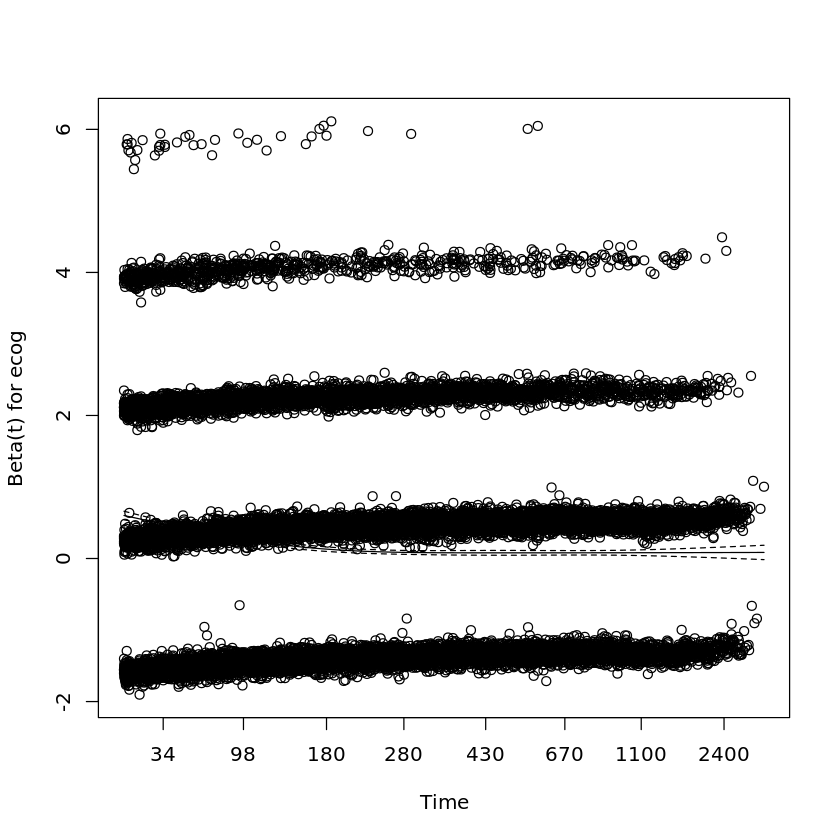

In [292]:
#Proportional hazards for ecog

plot(testCPH1, var = "ecog")

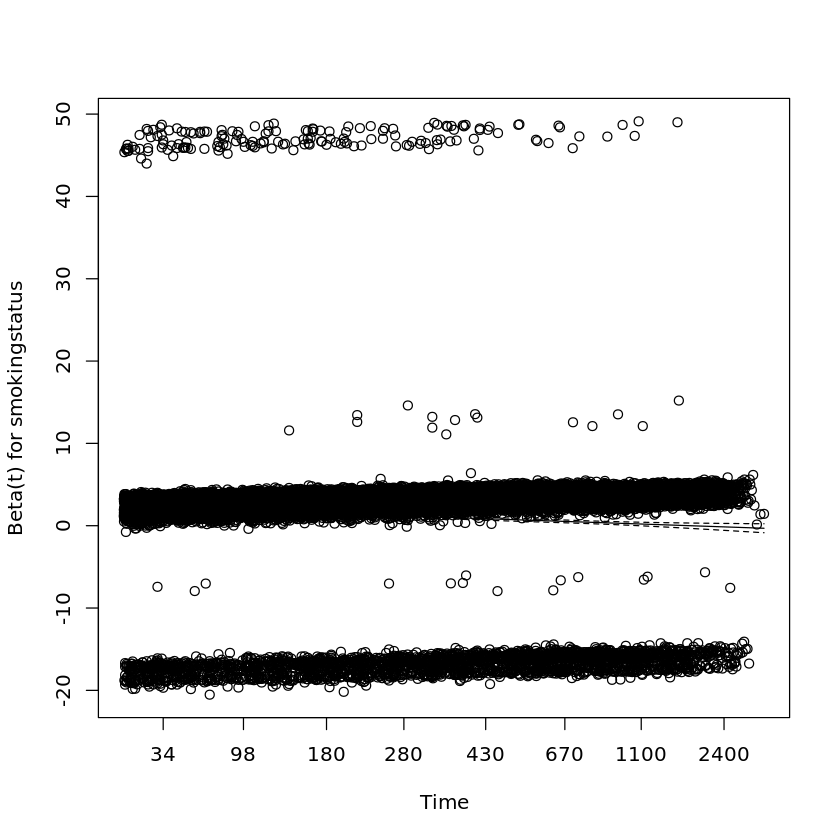

In [294]:
#Proportional hazards for smokingstatus

plot(testCPH1, var = "smokingstatus")

__tendency for beta(t) coefficient to change sign as time goes on 

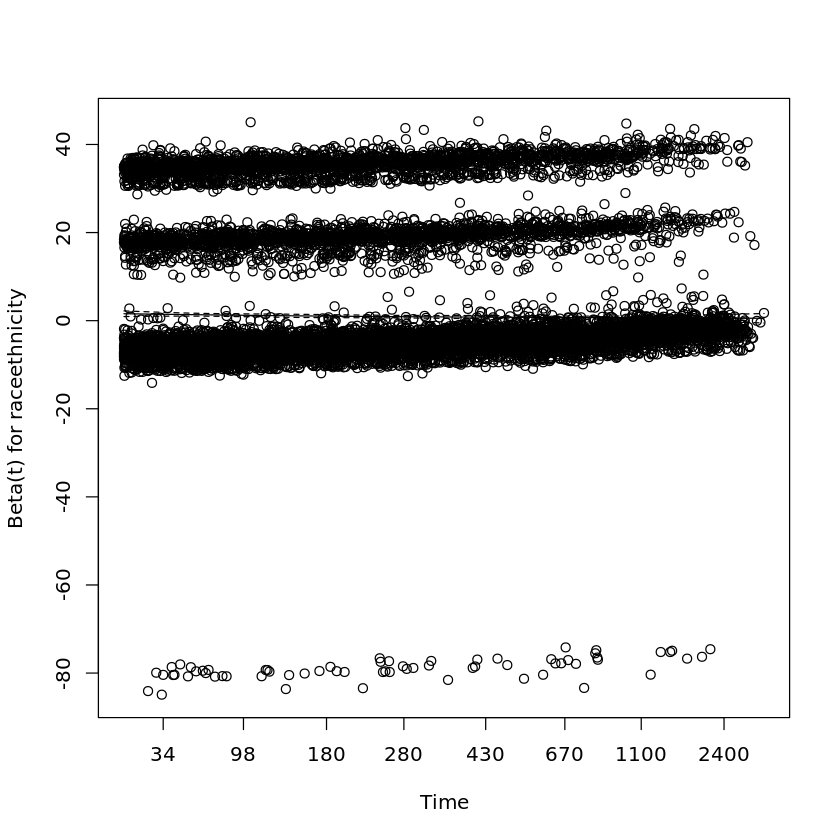

In [295]:
#Proportional hazards for raceethnicity

plot(testCPH1, var = "raceethnicity")

In [300]:
#Validatng the model

validate(fitCPH1, method = "crossvalidation", B = 10, pr = FALSE)

Singularity in coxph.fit. Coefficients:
        1         2         3         4         5         6         7         8 
 0.185051 -0.018781 -0.385314  0.837609 -0.348299  0.113164  0.129346  0.203851 
        9        10        11        12        13        14        15        16 
-0.186671 -0.494034 -0.996956 -0.338503  1.209221  0.307575  0.110334  0.003624 
       17        18        19        20        21        22        23        24 
 0.143150 -0.060923  0.206286  0.006901 -0.009205  0.009731  0.003375 -0.040516 
       25        26 
-0.200859        NA 

Divergence or singularity in 1 samples


      index.orig training   test optimism index.corrected n
Dxy       0.1904   0.1904 0.1895   0.0008          0.1896 9
R2        0.0590   0.0590 0.0572   0.0019          0.0572 9
Slope     1.0000   1.0000 0.9646   0.0354          0.9646 9
D         0.0044   0.0044 0.0056  -0.0011          0.0055 9
U         0.0000   0.0000 0.0001  -0.0001          0.0001 9
Q         0.0044   0.0045 0.0055  -0.0010          0.0054 9
g         0.3374   0.3374 0.3255   0.0119          0.3255 9

__index.corrected holds value for R2 correced by cross validation i.e. 0.0572. The explanatory power of the model will likely increase if more variables are added eg lot_category__

__Next, run individual patient features per patient through risk model (COX PH model) to create the risk score per patient -from scale factor for Cox PH model
Here - "worse outcome" means that a patient had an event earlier than the other patient
Next, check for 
- Number of PERMISSIBLE pairs present in the data from the "time to event column ALONE (ie if censoring occurs before event times, this is NOT a permissible pair as NOT able to compare events). Don't need risk column for this exercise
- Concordance between the patients with confirmed events at the different time periods (pt with worse outcome had higher risk score). For concOrdance, HIGHER risk should be assigned to SHORTER TIME to event
- Concordance between the patients with confirmed event vs censored event at a later time period
- check that the risk score for the patient at an earlier event is higher than that of the other patient, reflecting fact that this patient had a SHORTER TIME TO EVENT than the other
- Risk ties for patients with same times to event and (likely) similar risk scores
- Concordance index = #concordance pairs + 0.5 * #